# <center>Clasification K-Nearest Neighbours</center>
---

In [77]:
import numpy             as np
import matplotlib.pyplot as plt

from sklearn.datasets  import load_wine
from matplotlib.colors import ListedColormap

In [ ]:
wine_data = load_wine()

X = wine_data.data
Y = wine_data.target

In [78]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 1. Visualization KNN
---

In [79]:
_x1 = X[:, 2:3]     # aka Ash 
_x2 = X[:, 12:13]   # aka Proline

In [80]:
# Euclidean Distance.
distE = lambda a, b: np.sqrt(np.sum(np.power(a - b,2)))

# Manhatan Distance.
distM = lambda a, b: (abs(a[0] - b[0]) + abs(a[1] - b[1]))[0]

In [81]:
def evalute_points(xx, yy, n_x1, n_x2, k, dist):
        
    # Matriz for store values of Grid.
    zz = np.zeros((len(xx), len(yy)))
    
    for ix in range(len(xx)):
        for iy in range(len(yy)):
    
            grid_p = np.array([xx[ix, iy], 
                           yy[ix, iy]]).reshape(2,1)
        
            distances = [dist(np.array([n_x1[ip], n_x2[ip]]), grid_p) for ip in range(len(n_x1))]

            k_index = np.argsort(distances)[:k]

            probs = np.bincount(Y[k_index], minlength=3) / k

            pred = np.argmax(probs)
        
            zz[ix, iy] = pred
            
    return zz

In [82]:

def visualize_knn(x1, x2, Y, k, dist):
    
    n_x1 = (x1 - np.mean(x1)) / np.std(x1)
    n_x2 = (x2 - np.mean(x2)) / np.std(x2) 
    resolution = 75
    
    # Points of a Grid.
    gx = np.linspace(np.min(n_x1), np.max(n_x1), resolution)
    gy = np.linspace(np.min(n_x2), np.max(n_x2), resolution)  
    
    # Generate coordinates.
    xx, yy = np.meshgrid(gx, gy)
    
    zz = evalute_points(xx, yy, n_x1, n_x2, k, dist)
    
    # Visualization PLT
    
    color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    
    plt.figure(figsize=(10, 10))
    plt.title("K = " + str(k))
    plt.pcolor(xx, yy, zz, cmap=color, alpha=0.8) 
    
    plt.scatter(n_x1, n_x2, c=[{0 : "red", 
                                1 : "green", 
                                2 : "blue"}[k] for k in Y])
    plt.show()

  Manhattan Distance 



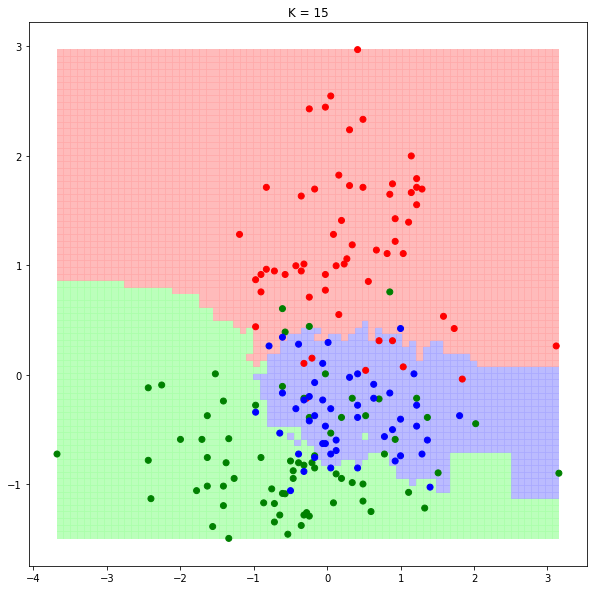



  Euclidian Distance 


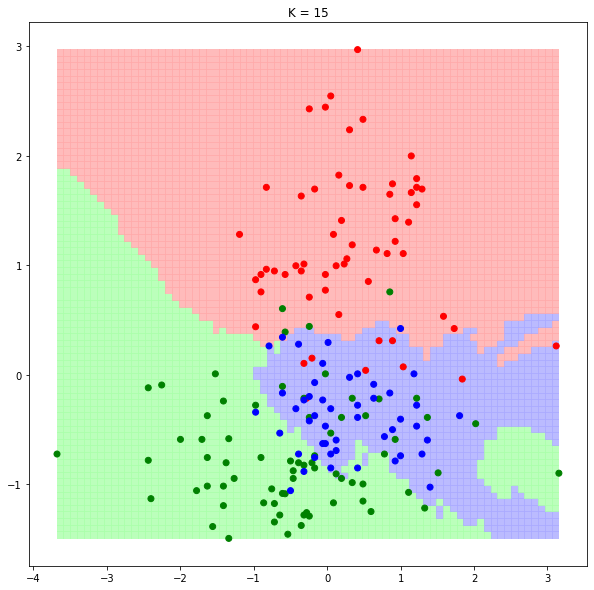

In [83]:
k = 15 # hyperparameter for determinate regions

print("  Manhattan Distance \n")
visualize_knn(_x1, _x2, Y, k, distM)

print("\n\n  Euclidian Distance ")
visualize_knn(_x1, _x2, Y, k, distE)

## 2. K election with Cross-Validation
---

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import scale
from sklearn.model_selection import KFold
from sklearn.neighbors       import KNeighborsClassifier

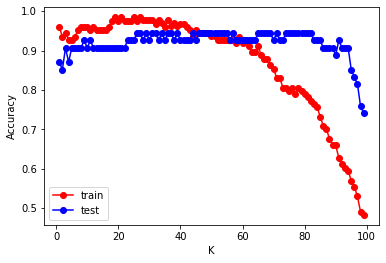

In [85]:
# Generate train and test set.
X_TR, X_test, Y_TR, Y_test = train_test_split(X, Y, test_size=0.3)  # 70 / 30

X_TR = scale(X_TR, with_mean=True, with_std=True)  #  normalization

accuracy_tr = []

_K = range(1, 100)

# N batches for train
kf = KFold(n_splits=10)
    
    
    # TRAIN
for k in _K:
    score = []

    for train_index, test_index in kf.split(X_TR):
        
        X_train, X_val = X_TR[train_index], X_TR[test_index]
        Y_train, Y_val = Y_TR[train_index], Y_TR[test_index]
        
        neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)

        score.append(neigh.score(X_val, Y_val))
    
    accuracy_tr.append(np.mean(score))

plt.plot(_K, accuracy_tr, "-ro")

    
    
    # TEST
accuracy_te = []

for k in _K:

    X_test = scale(X_test, with_mean=True, with_std=True)

    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_TR, Y_TR)
    
    accuracy_te.append(neigh.score(X_test, Y_test))

plt.plot(_K, accuracy_te,"-bo")
plt.legend(['train', 'test'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# The variation of K is stochastic because the model is not so affected by
# the K selected but for the type of random selection that is made.
# This can occur due to the scarcity and types of data we are using.